<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

# Visualización de datos

En esta notebook recorremos distintos tipos básicos de grafícos que pueden utilizarse en el análisis de datos, con aplicaciones prácticas. Nos centraremos no sólo el código para generarlos, sino también en algunos pequeños trucos para lograr gráficos más legibles.

Es importante recordar que, a pesar de que esta notebook utiliza los datos para ejemplificar los gráficos, en la aplicación real de la ciencia de datos ocurre lo contrario. Debemos pensar primero en la pregunta a responder, y luego diseñar la visualización. Esto incluye:

1. Encontrar el gráfico adecuado para los datos
2. Agrupar los datos de manera que resalten el patrón que ayuda a responder la pregunta inicial.
3. Encontrar los encodings visuales más efectivos para comunicar este patrón (aunque no vamos a hablar tanto de eso en esta notebook).

Para nuestros ejemplos usaremos un conjunto de datos de [sysarmy](https://sysarmy.com.ar/blog/tag/sueldos/) que recolecta las respuestas a una encuenta de sueldos a programadores de países de América Latina. Si bien esta encuesta es informal, es una de las pocas fuentes de datos sobre las condiciones de trabajo de los programadores en nuestro entorno. Además de ello, recopila otros medidores demográficos que ayudan a comprender mejor las tendencias económicas. En este caso, sólo nos concentraremos en los resultados de Argentina en enero de 2019, para evitar las complicaciones de manejar distintas monedas y la infación del país.

Pueden descargar el dataset directamente desde la [página de sysarmy](https://sysarmy.wordpress.com/2019/02/22/resultados-de-la-encuesta-de-sueldos-2019-1/) o desde [nuestro drive](https://drive.google.com/drive/folders/1yDFFyIiEf6wbA8LE7bVEBXBuz8Fq4dlv?usp=sharing)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [5]:
seaborn.__version__

'0.9.0'

In [6]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [7]:
# Con esto hacemos los gráficos más grandes, adecuados para el proyector.
seaborn.set_context(context='talk', font_scale=1.2)

In [8]:
## Cambiar la dirección del conjunto de datos de acuerdo a dónde lo guardaron
dataset = pandas.read_csv(
    '2019.1 - Encuesta de remuneración salarial - Argentina.csv',
    skiprows=[0,1,2])

In [9]:
dataset.columns

Index(['Me identifico', 'Tengo', 'Dónde estás trabajando',
       'Años de experiencia', 'Años en la empresa actual',
       'Años en el puesto actual', '¿Gente a cargo?',
       'Nivel de estudios alcanzado', 'Estado', 'Carrera', 'Universidad',
       'Realizaste cursos de especialización',
       '¿Contribuís a proyectos open source?', '¿Programás como hobbie?',
       'Trabajo de', 'Plataformas', 'Lenguajes de programación',
       'Frameworks, herramientas y librerías', 'Bases de datos',
       'QA / Testing', 'IDEs', '¿Qué SO usás en tu laptop/PC para trabajar?',
       '¿Y en tu celular?', '¿Tenés guardias?', 'Cuánto cobrás por guardia',
       '¿Porcentaje, bruto o neto?', 'Tipo de contrato',
       'Salario mensual BRUTO (en tu moneda local)',
       'Salario mensual NETO (en tu moneda local)',
       '¿Qué tan conforme estás con tu sueldo?',
       'Cómo creés que está tu sueldo con respecto al último semestre',
       'Recibís algún tipo de bono', 'A qué está atado el bono',


## Tablas

Las tablas son muchas veces dejadas de lado en las visualizaciones, pero son una de las formas de representación más poderosa. Usualmente partimos de una tabla para generar visualizaciones más complejas, pero esto no significa que generar buenas tablas no sea útil en el proceso de comunicación.

* Muestran cantidades exactas
* Representan cualquier tipo de datos
* Son de acceso universal
* Son fáciles de crear
* Permiten comprar muchas variables

Lo primero que tenemos que hacer para comenzar a enteder el dataset es ver los valores como una tabla, para indentificar la información en cada una de las columnas.

In [178]:
dataset[:10]

,Me identifico,Tengo,Dónde estás trabajando,Años de experiencia,Años en la empresa actual,Años en el puesto actual,¿Gente a cargo?,Nivel de estudios alcanzado,Estado,Carrera,...,Orientación sexual,¿Tenés algún tipo de discapacidad?,¿Sentís que esto te dificultó el conseguir trabajo?,¿A qué eventos de tecnología asististe en el último año?,Cantidad de empleados,Actividad principal,¿La recomendás como un buen lugar para trabajar?,¿Cómo calificás las políticas de diversidad e inclusión?,¿A cuántos kilómetros de tu casa queda la oficina?,Beneficios extra
0,Hombre,22,Catamarca,2.0,1.0,1.0,0,Universitario,En curso,ING informática,...,Heterosexual,NaN,NaN,NaN,1001-2000,Producto basado en Software,8,9,2.0,Capacitaciones y/o cursos
1,Hombre,23,Catamarca,2.0,1.0,1.0,0,Secundario,Completado,Ing informática,...,Heterosexual,NaN,NaN,Charlas online,51-100,Producto basado en Software,8,10,2.0,"Capacitaciones y/o cursos, Licencia de paterni..."
2,Mujer,35,Chaco,8.0,7.0,2.0,2,Posgrado,En curso,MTI,...,dgsdg,NaN,No,varios,201-500,Otras industrias,4,4,0.2,"Capacitaciones y/o cursos, Licencia de paterni..."
3,Hombre,41,Chaco,20.0,2.0,10.0,0,Universitario,Completado,Lic en sistemas,...,Heterosexual,NaN,NaN,Ninguno,1-10,Servicios / Consultoría de Software / Digital,5,1,-1.0,"Horarios flexibles, Vacaciones flexibles (adic..."
4,Hombre,35,Chaco,5.0,3.0,2.0,0,Universitario,Completado,Analisis en Sistemas,...,Heterosexual,NaN,No,NaN,501-1000,Producto basado en Software,8,8,1.0,"Capacitaciones y/o cursos, Clases de idiomas, ..."
5,Hombre,38,Chaco,16.0,16.0,16.0,0,Terciario,Incompleto,Analista de Sistemas,...,Heterosexual,NaN,No,Ninguno,201-500,Otras industrias,6,4,2.0,Ninguna de las anteriores
6,Hombre,30,Chaco,9.0,5.0,5.0,3,Terciario,Completado,T S P,...,Heterosexual,NaN,No,NaN,201-500,Otras industrias,6,10,2.0,"Abono de celular y/o Internet, Comidas pagas/s..."
7,Hombre,32,Chaco,10.0,2.0,2.0,0,Universitario,Incompleto,Ing. en Sistemas,...,Heterosexual,NaN,NaN,Ninguno :(,1001-2000,Otras industrias,5,5,5.0,Ninguna de las anteriores
8,Hombre,28,Chaco,7.0,3.0,1.0,2,Universitario,Incompleto,Ingeniería en Sistemas,...,Heterosexual,NaN,No,NaN,51-100,Servicios / Consultoría de Software / Digital,10,5,-1.0,"Horarios flexibles, Vacaciones flexibles (adic..."
9,Hombre,29,Chaco,0.0,0.0,0.0,0,Universitario,En curso,Ingenieria en Sistemas,...,Heterosexual,NaN,No,NaN,501-1000,Producto basado en Software,5,5,3.0,Capacitaciones y/o cursos


También pandas nos permite otras operaciones simples de estadística descriptiva. En la siguiente línea, estamos filtrando las filas que se identifican como *Hombres* y describiendo la distribución de la columna *¿Qué tan conforme estás con tu sueldo?*

In [179]:
# Cantidad de filas y de columnas
dataset.shape

(4482, 47)

In [180]:
# Descripción de la distribución de la variable "¿Qué tan conforme estás con tu sueldo?"
# solo en los registros donde "Me identifico" tiene el valor Hombre
dataset[dataset['Me identifico'] == 'Hombre']['¿Qué tan conforme estás con tu sueldo?'].describe()

count    3890.000000
mean        2.560154
std         0.840359
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: ¿Qué tan conforme estás con tu sueldo?, dtype: float64

## Gráficos de barra

Comparan **cantidades numéricas** entre **variables categóricas**. Son uno de los encodings más fieles y fáciles de percibir

Son gráficos muy versátiles, pero no siempre son adecuados. Mientras más barras se grafican, menos atención se pone en la variación entre una barra y otra, y más evidente es la distribución total. Los gráficos de barra también son muy sensibles al ordenamiento, ya que mientras más alejadas están las barras más difícil es compararlas. Por otra parte, la diferencia en el tamaño de cada barra puede codificar sólo cierta cantidad de información. Por ejemplo, si las barras son grandes en alto, una pequeña diferencia entre ellas pasará desapercibida, mientras que si las barras son pequeñas, la misma diferencia será más evidente.

Los gráficos de barra son lo más adecuados para ver, por ejemplo, la cantidad de registro por género, por provincia, incluso por nivel de estudios. Además de eso, necesitamos seleccionar una variable aleatoria con datos numéricos para poder graficar en el eje x. Tomemos por ejemplo el nivel de conformidad con el sueldo. Veamos cómo se construye uno de estos gráficos:

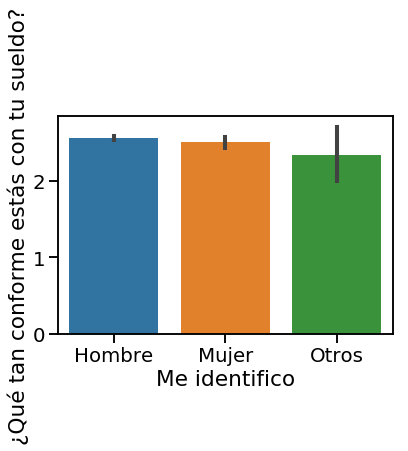

In [9]:
seaborn.barplot(data=dataset, x='Me identifico', y='¿Qué tan conforme estás con tu sueldo?')

En este gráfico estamos viendo el promedio de puntaje de conformidad de cada uno de los grupos. Sin embargo, esto no es evidente a primera vista. ¿Cuál es el rango de la variable y? Como vimos anteriormente, el valor máximo que puede tomar el puntaje es de 4, si no mostramos esto, el gráfico no tiene punto de referencia.
Otra interpretación posible sería que cada barra represente la cantidad de hombres conformes o no, ya que el usuario no tiene suficiente información para inferir el significado del eje vertical. Hay que tener en cuenta que muchas veces, **el nombre original de la columna no representa la información agregada**.

Por otra parte, ¿qué significan las líneas negras? Son los intervalos de confianza, que tienen un valor por default de 95. Indica que el verdadero valor poblacional del estadístico se encuentra en ese rango, con una confianza del 95%. Por eso vemos que para los hombres, el rango es mucho más pequeño, ya que la muestra es mucho más grande. Para el grupo de "Otros", no tenemos certeza del valor real de la media poblacional porque la muestra es demasiado pequeña. 

Este estadísico suele ser difícil de interpretar para quienes no son expertos en estadística, puede ser conveniente reemplazarlo por la desviación estándar de la muestra. Si bien estamos usando la misma codificación visual (las rayitas negras), los valores que representamos son completamente distintos. Si usamos un intervalo de confianza, estamos hablando de la distribución del estimador de la media poblacional, que es una variable aleatorio que toma valores en todas las muestras posibles. Por otro lado, si usamos la desviación estándar, estamos hablando del valor del estadístico en esta muestra.

Con esas observaciones, podemos contruir un gráfico más representativo.

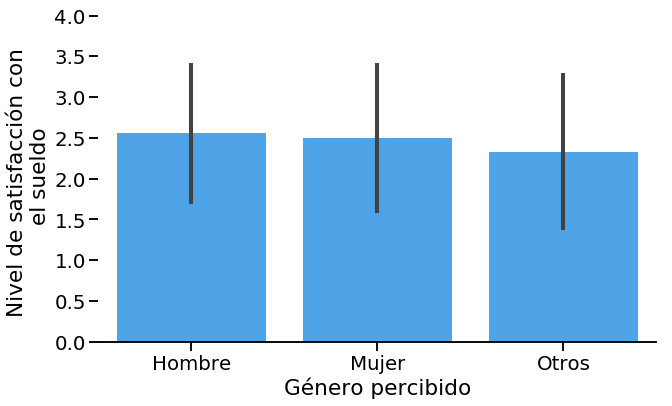

In [10]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset, x='Me identifico', y='¿Qué tan conforme estás con tu sueldo?',
                color=BLUE, ci='sd')
plt.ylabel('Nivel de satisfacción con \n el sueldo')
plt.xlabel('Género percibido')
plt.ylim(0, 4)
seaborn.despine(left=True)

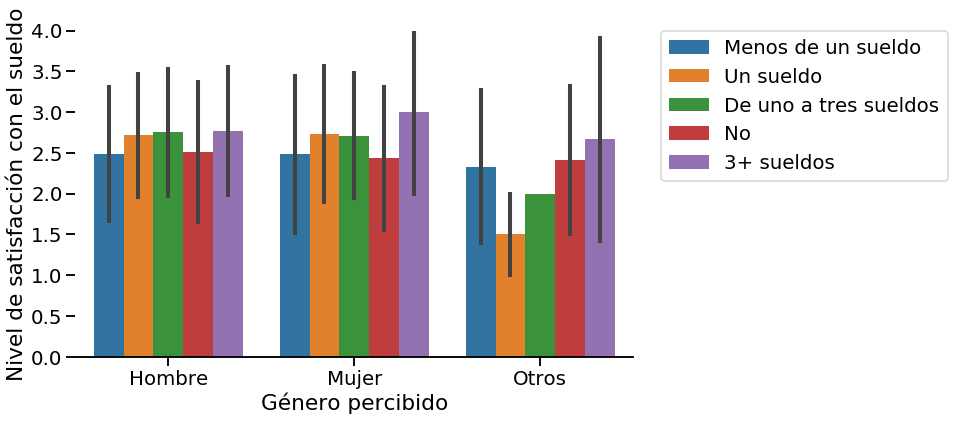

In [188]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset, x='Me identifico', y='¿Qué tan conforme estás con tu sueldo?',
                hue='Recibís algún tipo de bono', ci='sd')
plt.ylabel('Nivel de satisfacción con el sueldo')
plt.xlabel('Género percibido')
plt.ylim(0, 4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine(left=True)

En este gráfico, hay demasiados grupos y están demasiado juntos como para ser de utilidad. Además de ello, existe un orden intuitivo en el agrupamiento, desde No hasta "3+ sueldos"

In [11]:
dataset['Recibís algún tipo de bono'].unique()

array(['Menos de un sueldo', 'Un sueldo', 'De uno a tres sueldos', 'No',
       '3+ sueldos'], dtype=object)

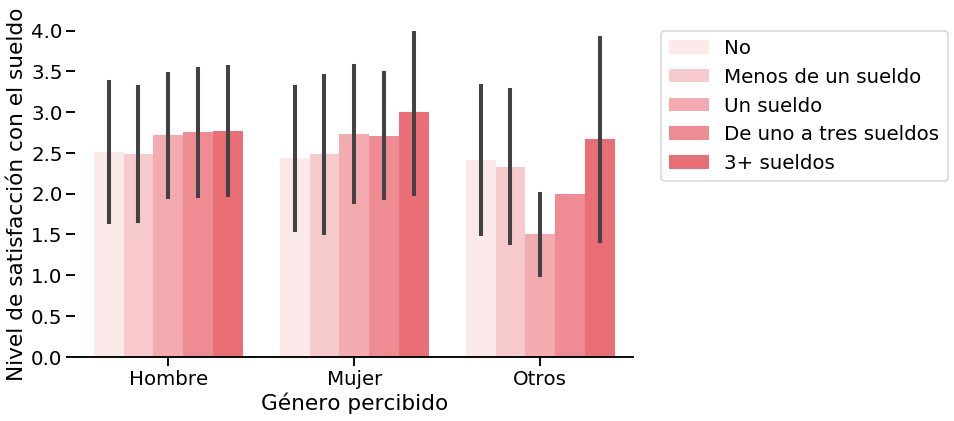

In [190]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset, x='Me identifico', y='¿Qué tan conforme estás con tu sueldo?',
                hue='Recibís algún tipo de bono', ci='sd', color=RED,
                hue_order=['No', 'Menos de un sueldo', 'Un sueldo', 'De uno a tres sueldos', '3+ sueldos'])
plt.ylabel('Nivel de satisfacción con el sueldo')
plt.xlabel('Género percibido')
plt.ylim(0, 4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine(left=True)

Dependiendo de qué queremos comparar, podemos formar los grupos de otra manera:

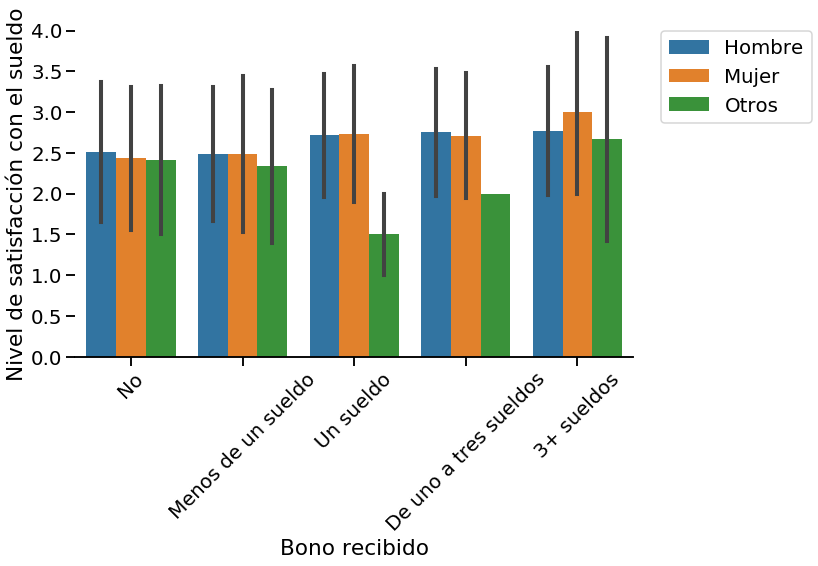

In [191]:
plt.figure(figsize=(10,6))

seaborn.barplot(data=dataset, x='Recibís algún tipo de bono', y='¿Qué tan conforme estás con tu sueldo?',
                hue='Me identifico', ci='sd',
                order=['No', 'Menos de un sueldo', 'Un sueldo', 'De uno a tres sueldos', '3+ sueldos']
               )
plt.ylabel('Nivel de satisfacción con el sueldo')
plt.xlabel('Bono recibido')
plt.ylim(0, 4)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine(left=True)

### Preguntas:

* ¿Cuál es la principal comparación realizada en cada uno de los grupos?
* Las personas que se identifican con género "Otro" y más de 3 sueldos como bono, ¿están realmente menos satisfechas?

## Countplot

Otro gráfico de barra muy útil es el que en el eje vertical tiene el conteo de la cantidad de registros en una categoría. Seaborn puede graficar esto muy fácilmente!

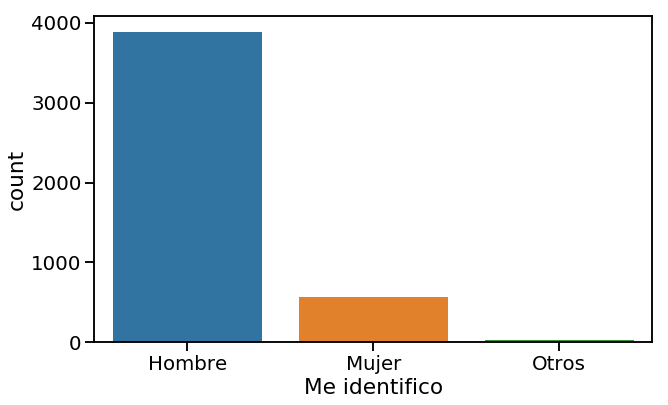

In [12]:
plt.figure(figsize=(10,6))
seaborn.countplot(data=dataset, x='Me identifico')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

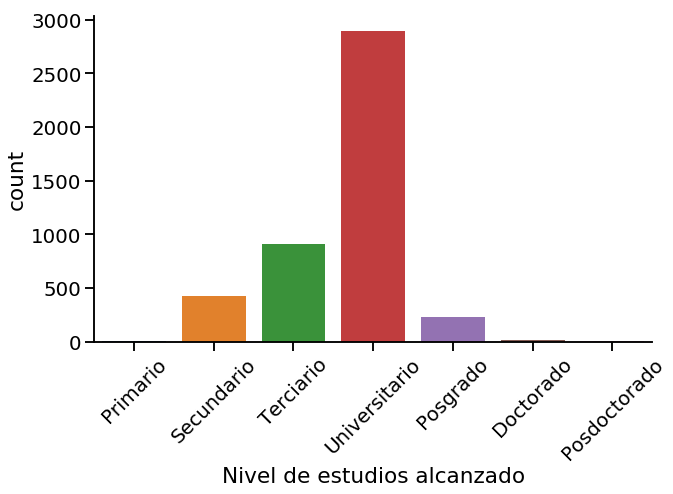

In [13]:
plt.figure(figsize=(10,6))
order = ['Primario', 'Secundario', 'Terciario', 'Universitario', 'Posgrado', 'Doctorado', 'Posdoctorado']
seaborn.countplot(data=dataset, x='Nivel de estudios alcanzado', order=order)
seaborn.despine()
plt.xticks(rotation=45)

## Histogramas

Muestra la distribución de una variable numérica, dividiendo las variables en *bines* o estimando una función de densidad. Ojo, ¡no es lo mismo que un gráfico de barras!

Por ejemplo, podemos graficar con más precisión la distribución de la variable *Salario mensual*. Pero, ¿nos conviene usar el salario bruto o el salario neto? Para esto, podemos ver qué columna tiene más respuestas:

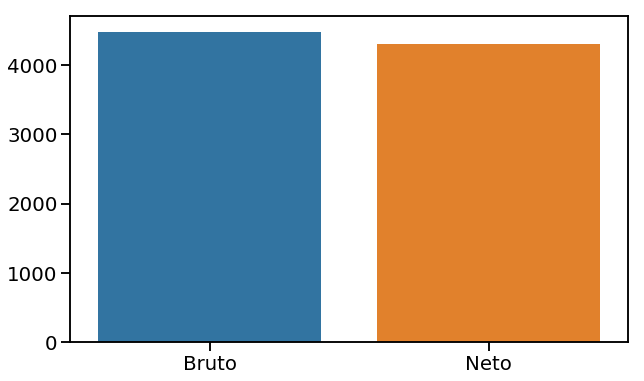

In [198]:
plt.figure(figsize=(10,6))
seaborn.barplot(
    x=['Bruto', 'Neto'],
    y=[dataset['Salario mensual BRUTO (en tu moneda local)'].count(), dataset['Salario mensual NETO (en tu moneda local)'].count()])

Como las cantidades son muy similares, usamos Neto ya que es más intuitivo y contempla salarios en negro. Realicemos nuestro primer histograma:

In [15]:
NETO_COL = 'Salario mensual NETO (en tu moneda local)'

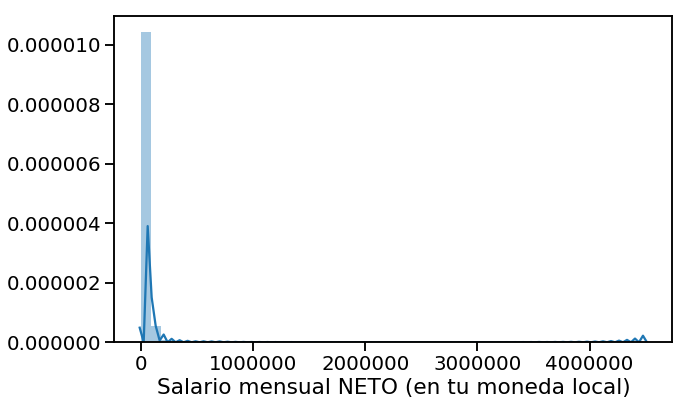

In [16]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset[NETO_COL].dropna())

### Outliers

Para poder ver mejor este gráfico, tenemos que sacarle los outliers. Veamos cuántos registros tienen valores mayores a 400000

In [17]:
dataset[dataset[NETO_COL] > 400000].shape[0]

10

Al ser tan pocos registros, podemos ignorarlos sin perder generalización. Otra forma de calcular los outliers es con los percentiles o dejando sólo los que se encuentran en un rango de X desviaciones estándares de la media.

In [18]:
salarios = dataset[NETO_COL]
# Eliminar filas a más de 2.5 desviaciones estándares de la media
mask_salarios_neto = numpy.abs(salarios-salarios.mean()) <= (2.5*salarios.std())
data = salarios[mask_salarios_neto]
print("Filas removidas", salarios.count() - data.count())
print("Salario máximo considerado", data.max())

Filas removidas 16
Salario máximo considerado 285000.0


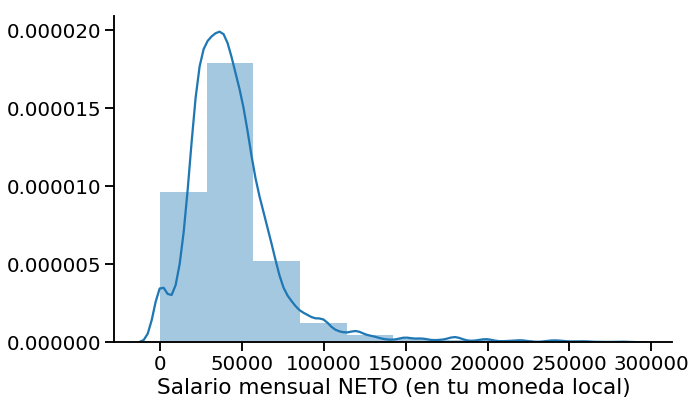

In [19]:
plt.figure(figsize=(10,6))
seaborn.distplot(data, bins=10)
seaborn.despine()

Utilizando este histograma, también vemos otra tendencia atípica, muchas personas tienen un salario cercano a 0. Podemos investigar más esa sección

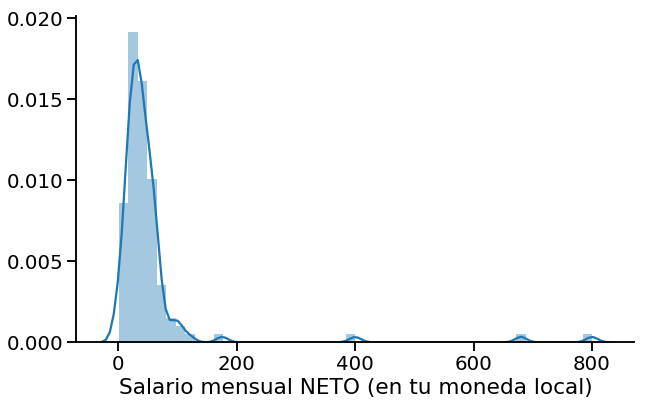

In [211]:
plt.figure(figsize=(10,6))
seaborn.distplot(data[data < 1000], bins=50)
seaborn.despine()

In [212]:
data[data < 100][:10]

6      56.000
39     39.054
43      1.000
142    20.000
203    20.000
377    56.979
540    32.000
611    34.013
642    22.000
651    40.000
Name: Salario mensual NETO (en tu moneda local), dtype: float64

Vemos que los valores son muy variables, y no tienen sentido en el contexto argentino. Una hipóteiss posible es que los datos fueron cargados incorrectamente, confundiendo el punto decimal con la coma para las decenas de mil. Ignoraremos los sueldos menores a 100 pesos argentinos al menos.

In [20]:
def clean_salario_neto(dataset):
    """Returns the row with of dataset with Salario Neto values and without outliers."""
    salarios = dataset[NETO_COL]
    mask_salarios_outlier = (
        numpy.abs(salarios-salarios.mean()) <= (2.5*salarios.std())) & (salarios > 100)
    return dataset[mask_salarios_outlier]

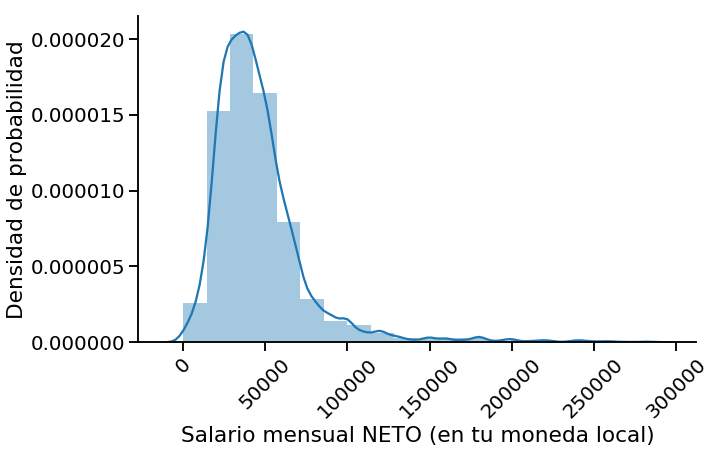

In [22]:
salario_neto = clean_salario_neto(dataset)
plt.figure(figsize=(10,6))
seaborn.distplot(salario_neto[NETO_COL], bins=20)
plt.xticks(rotation=45)
plt.ylabel('Densidad de probabilidad')
seaborn.despine()

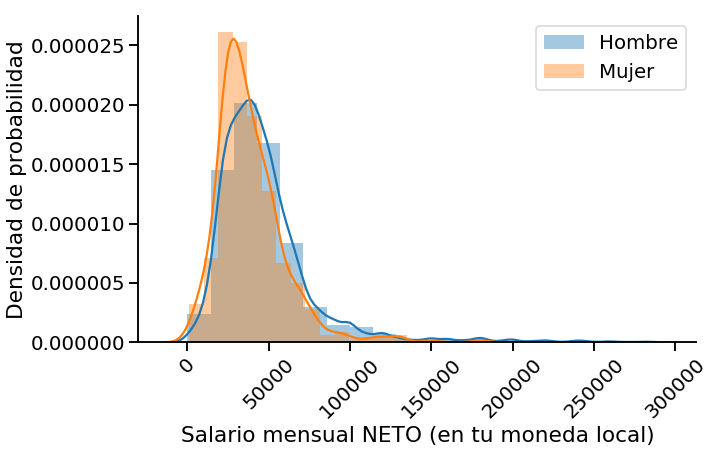

In [23]:
plt.figure(figsize=(10,6))
seaborn.distplot(
    salario_neto[salario_neto['Me identifico'] == 'Hombre'][NETO_COL],
    bins=20, label='Hombre')
seaborn.distplot(
    salario_neto[salario_neto['Me identifico'] == 'Mujer'][NETO_COL],
    bins=20, label='Mujer')
plt.xticks(rotation=45)
plt.ylabel('Densidad de probabilidad')
plt.legend()
seaborn.despine()

Volveremos más adelante a analizar esta aparente diferencia de pago de acuerdo al género, cuando comparemos distribuciones.

## Gráficos de línea

Es efectivo para comparar cantidades numéricas en una o varias categorías. Si lo comparamos con un gráfico de barras, tienen ventajas y desventajas. En primer lugar, sugiere una relación más fuerte entre los datos del eje horizontal, que deben ser secuenciales. Además de ello, pueden representar más valores ya que el peso visual de cada punto es mucho menor que una barra.

Por otra parte, un gráfico de líneas con pocos puntos puede ser indicativo de una tendencia que no existe (o que no tenemos suficientes datos como para mostrarla).

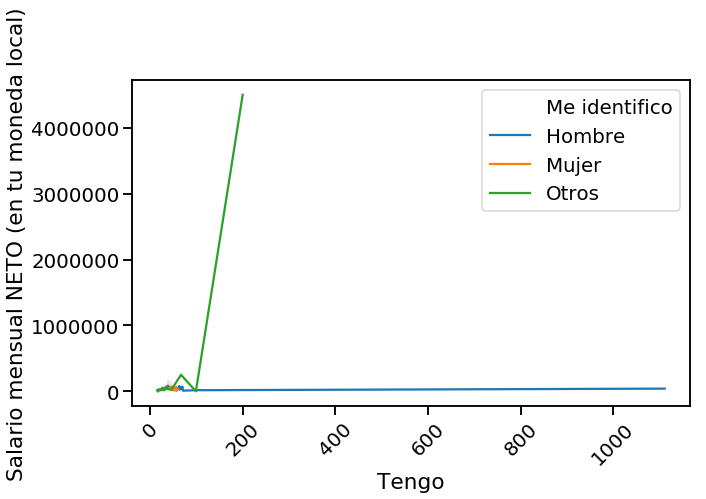

In [238]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=dataset,
                  x='Tengo', y=NETO_COL,
                  hue='Me identifico')
plt.xticks(rotation=45);

Claramente, hay muchas cosas para mejorar en este gráfico. En principio, ordenar los intervalos del eje x, sacar los outliers nuevamente, utilizar la desviación estándar como intervalo de confianza.

También se pueden eliminar los grupos con pocos valores. Sin embargo, esto debe ser considerado de acuerdo al caso. Por ejemplo, ¿es conveniente sacar el grupo donde la variable "Me identifico" toma el valor de "Otro", a pesar de tener pocos registros?

In [24]:
dataset.groupby('Me identifico').size()

Me identifico
Hombre    3890
Mujer      565
Otros       27
dtype: int64

Comencemos por el eje x. Primero que nada, tenemos que remover la fila con los outliers. Como consideramos estos valores de 99, 200 y 1111 errores, podemos borrarlos directamente del conjunto de datos.

In [51]:
age_mask = dataset.Tengo < 90
dataset[~age_mask] = numpy.nan

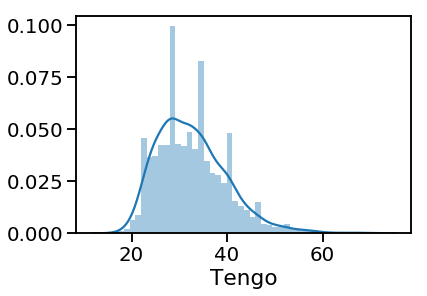

In [241]:
seaborn.distplot(dataset['Tengo'].dropna())

Veamos cómo queda ahora

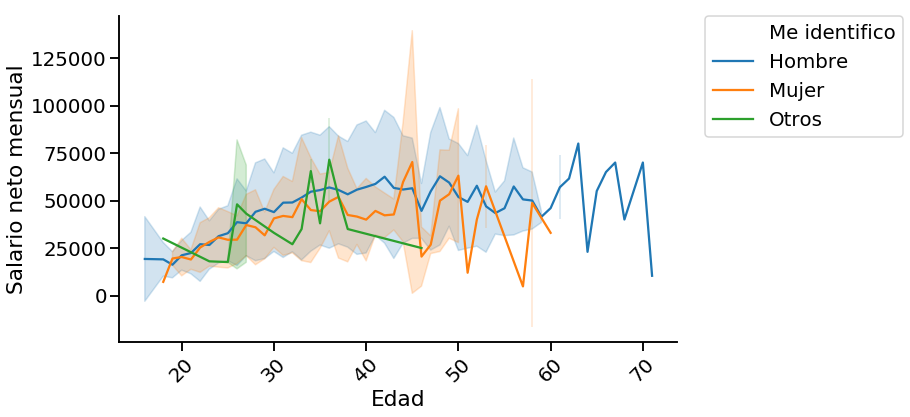

In [306]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=clean_salario_neto(dataset),
                  x='Tengo', y=NETO_COL,
                  hue='Me identifico', ci='sd')
plt.ylabel('Salario neto mensual')
plt.xlabel('Edad')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Aún así, vemos que no hay suficientes puntos en la recta para crear curvas suaves y es difícil ver la tendencia. Una opción en estos casos es agregar los datos en categorías más grandes, tratando de generar un nivel más alto de abstracción que pueda esclarecer patrones.

Para la edad en particular, podemos crear rangos etareos de 5 años. También es conveniente poner un valor máximo y mínimo a partir del cual agrupar los valores ya que la distribución puede tener largas colas. En este caso, sólo sería necesario el valor superior, para agrupar personas, por ejemplo, mayores de 50 años. La función de pandas `cut` sirve para este tipo de situaciones.

In [262]:
def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(numpy.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x+bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    return pandas.cut(column, pandas.IntervalIndex.from_tuples(intervals))

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

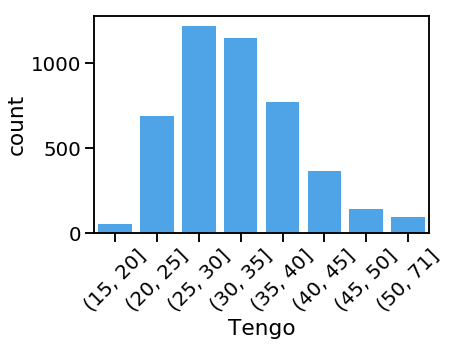

In [263]:
seaborn.countplot(to_categorical(dataset.Tengo.dropna()), color=BLUE)
plt.xticks(rotation=45)

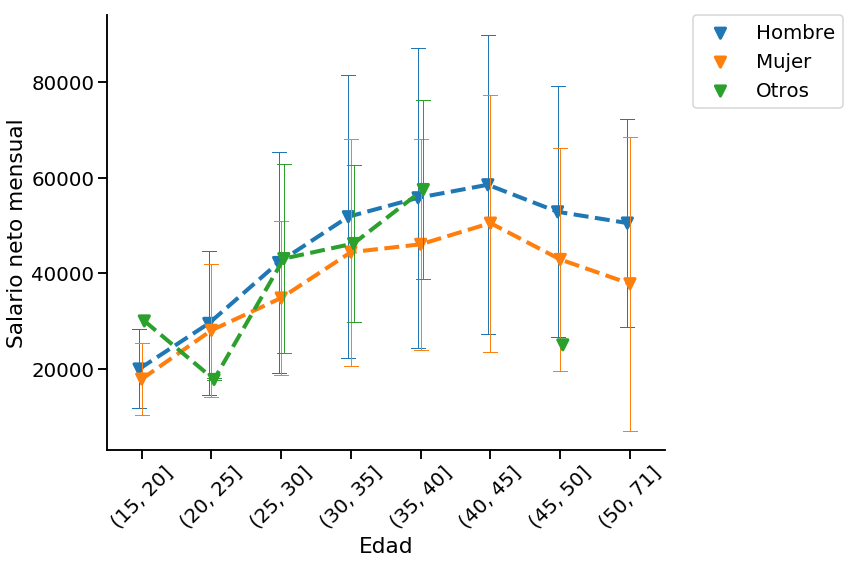

In [308]:
plt.figure(figsize=(10,8))
age_data = clean_salario_neto(dataset)
age_data = age_data[~age_data.Tengo.isnull()]
age_data['Edad (intervalos)'] = to_categorical(age_data.Tengo)
seaborn.pointplot(data=age_data,
                  x='Edad (intervalos)', y=NETO_COL,
                  hue='Me identifico', dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2)
plt.ylabel('Salario neto mensual')
plt.xlabel('Edad')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

## Gráficos de caja

Muestra la distribución de una variable numérica, de una forma más condensada que un histograma. Son muy útiles para comparar muchas distribuciones, pero sólo cuando son muy distintas entre ellas, ya que oscurecen algunas sutilezas. Otros problema de este tipo de gráficos en que no todo el mundo recuerda cómo leerlos.

Por ejemplo, volvamos al ejemplo anterior para comparar la distrubción etarea con el salario neto. Con un gráfico de caja, se vería de la siguiente manera:

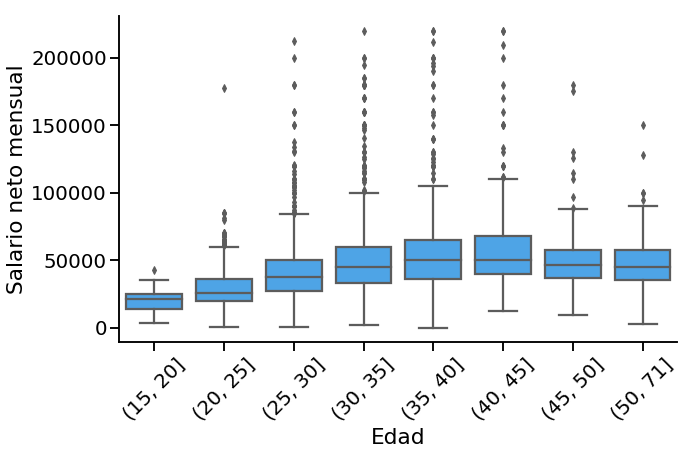

In [309]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=age_data,
                x='Edad (intervalos)', y=NETO_COL,
                color=BLUE)
plt.ylabel('Salario neto mensual')
plt.xlabel('Edad')
plt.xticks(rotation=45)
seaborn.despine()

Este tipo de gráfico permite ver con más detalles que, a pesar de que los centros de las distribuciones parezcan seguir una progresión lineal ascendente, los puntos más bajos se mantienen en el mismo rango. Adicionalmente, los valores más altos se encuentran en las edades medias, probablemente debido a la baja cantidad de personas en los grupos etareos más altos.

Con los boxplot también podemos comparar distribuciones por grupos. En este caso, si un grupo tiene una población muy reducida, su influencia visual es mucho menor ya que se traducen a cajas pequeñas o incluso sólo puntos.

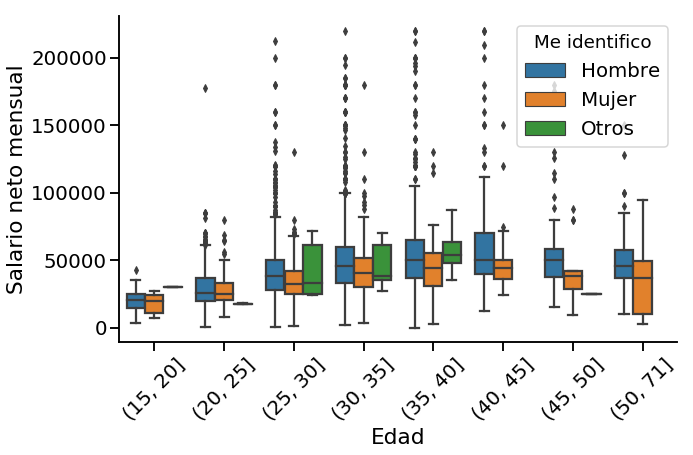

In [310]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=age_data,
                x='Edad (intervalos)', y=NETO_COL,
                hue='Me identifico')
plt.ylabel('Salario neto mensual')
plt.xlabel('Edad')
plt.xticks(rotation=45)
seaborn.despine()

En este gráfico podemos ver, por ejemplo, todos los outliers con sueldos mayores a 100,000, que en el otro gráfico se agrupaban dentro de la barra de desviación estándar.

## Gráficos de puntos (scatterplot)

Muestra la relación entre 2 o 3 variables numéricas continuas. Adicionalmente, se puede usar el color y la forma de los puntos para variables categóricas, y el tamaño para variables numéricas.

Para poder ejemplificar el gráfico de puntos, debemos encontrar dos variables numéricas continuas. Tener en cuenta que por más que una variable sea discreta, al incluirla en un scatter plot la estamos tratando como una variable continua.

En el dataset que estamos analizando, podríamos tratar de encontrar la respuesta a "Los aumentos para los empleados, ¿son más grandes mientras menos cobran, o son proporcionales a los ingresos?"

Antes de poder explorar la relación entre las variables, debemos ver la distribución de cada una de ellas para detectar anomalías. Ya sabemos que el Salario mensual tiene algunos outliers, así que podemos sacarlos. Las otras columnas relacionadas a este problema son *¿Tuviste ajustes por inflación en 2017?* y *¿De qué % fue el ajuste?*

In [26]:
data_ajustes = clean_salario_neto(dataset)[
    [NETO_COL, '¿Tuviste ajustes por inflación en 2018?',
     '¿De qué % fue el ajuste?', 'Me identifico']
]
data_ajustes[:10]

,Salario mensual NETO (en tu moneda local),¿Tuviste ajustes por inflación en 2018?,¿De qué % fue el ajuste?,Me identifico
0,33000.0,Dos,25.0,Hombre
1,22000.0,Uno,22.0,Hombre
2,45000.0,Dos,4.0,Mujer
3,65000.0,Más de dos,40.0,Hombre
4,28780.0,Uno,10.0,Hombre
5,32000.0,No,0.0,Hombre
7,35000.0,Dos,20.0,Hombre
8,245000.0,No,0.0,Hombre
9,15000.0,No,0.0,Hombre
10,23500.0,Uno,10.0,Hombre


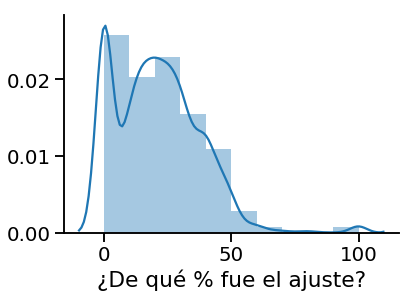

In [27]:
seaborn.distplot(data_ajustes['¿De qué % fue el ajuste?'].dropna(), bins=10)
seaborn.despine()

El procentaje de ajuste no tiene outliers, pero tiene una concentración anormal en el valor 0. Podemos dividir esta distribución en dos partes: si recibió aumento o si no, y tratar de buscar las correlaciones por separado. 

Un **histograma de varias variables** es muy útil para esto, ya que nos permite comparar dos distribuciones en el mismo gráfico.

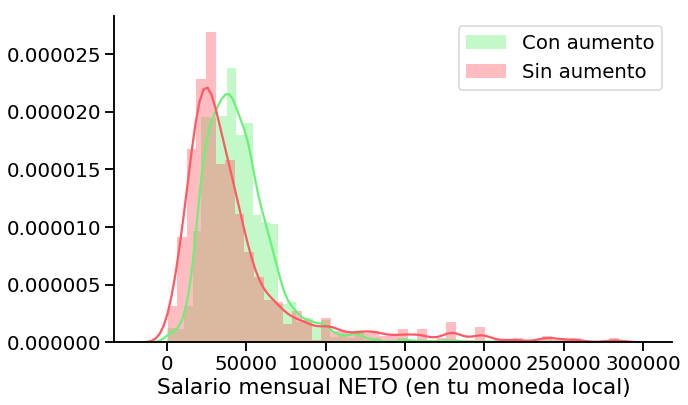

In [28]:
con_aumento = data_ajustes['¿Tuviste ajustes por inflación en 2018?'] != 'No'
sin_aumento = data_ajustes['¿Tuviste ajustes por inflación en 2018?'] == 'No'
plt.figure(figsize=(10,6))
seaborn.distplot(data_ajustes[con_aumento][NETO_COL].dropna(), color=GREEN, label='Con aumento')
seaborn.distplot(data_ajustes[sin_aumento][NETO_COL].dropna(), color=RED, label='Sin aumento')
plt.legend()
seaborn.despine()

Podemos ver que, efectivamente, las distribuciones de salario parecen ser distintas, y que a las personas con salarios menores se les otorgan menos ajustes. 

Tomemos ahora sólo el caso de la población que recibió el ajuste

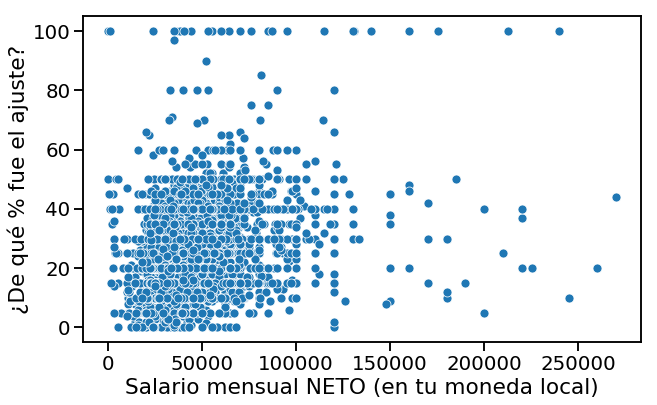

In [29]:
plt.figure(figsize=(10,6))
seaborn.scatterplot(data=data_ajustes[con_aumento],
                    x=NETO_COL,
                    y='¿De qué % fue el ajuste?')

El gráfico del scatterplot no muestra ninguna tendencia. Podemos utilizar seaborn para estimar una regresión lineal con los datos, utilizando el gráfico *regplot*. También intentaremos limpiar visualmente el gráfico.

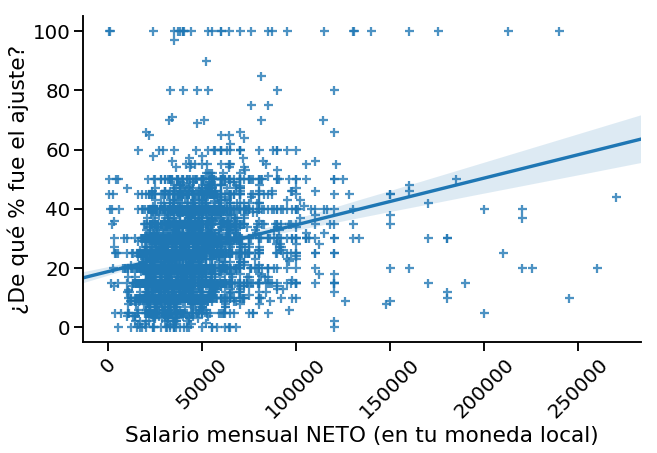

In [30]:
plt.figure(figsize=(10,6))
seaborn.regplot(data=data_ajustes[con_aumento],
                x=NETO_COL, y='¿De qué % fue el ajuste?',
                marker='+')
plt.xticks(rotation=45)
seaborn.despine()

La regresión linear estimada parece indicar que no existe correlación fuerte entre las variables. Sin embargo, existen maneras más efectivas de medir correlación, gráficas y analíticas, que veremos más adelante.

## Gráficos QQ

Otra forma de comparar visualmente dos variables es un gráfico QQ, que muestra dos distribuciones de probabilidad juntas graficando sus cuantiles. Cada la coordenada x de cada punto correponde al percentil de la segunda distribución, y la coordenada y el mismo percentil de la primera distribución. Si los percentil forman la recta indetidad, entonces ambas distribuciones son iguales.

Otras interpretaciones también son posibles: si ambas distribuciones están relacionadas linearmente, entonces los puntos del gráfico QQ estarán alineados, aunque no necesariamente en la dirección de la identidad. En este caso, si la tendencia del gráfico está por debajo de la identidad (es decir, tiene menor pendiente), la segunda distribución (la del eje x) es más dispersa que la primera. 

Por otro lado, se podría observar una forma curva o en forma de S. **¿Qué interpretación se podría dar a estas formas?**

Este es un tipo de gráfico poco estándar, por lo que es recomendable para audiencias más experimentadas. Permite ver más información que un histograma, pero no muestra medidas de tendencia central.

### Ejemplo
Usaremos un gráfico QQ para **comparar la distribución de los salarios contra a una distribución normal**. Pero para ello, primero tenemos que saber qué normal, porque seguro que no es la normal estandarizada. Recordemos que los parámetros de la función normal son la media y la desviación estándar muestral, o *loc* y *scale* según scipy.

In [31]:
from scipy import stats

# Estimamos los parámetros muestrales. Si bien son sólo la media y desviación estándar, podemos
# usar scipy para estimar (fit) cualquier distribución.
loc, scale = stats.norm.fit(salario_neto[NETO_COL])
loc, scale

(46343.52741958713, 29917.165640760115)

Ahora podemos crear una nueva distribución normal con estos parámetros

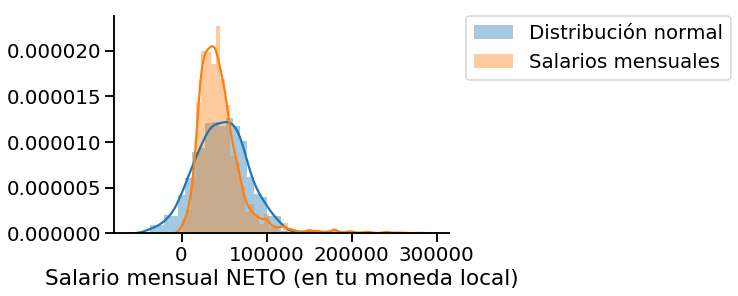

In [32]:
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
# La graficamos
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(salario_neto[NETO_COL], label='Salarios mensuales')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Ahora podemos armar el gráfico QQ. Usamos dos muestras del mismo tamaño, y calculamos los cuartiles.

In [34]:
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(salario_neto[NETO_COL], percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(salario_neto[NETO_COL])), percs)

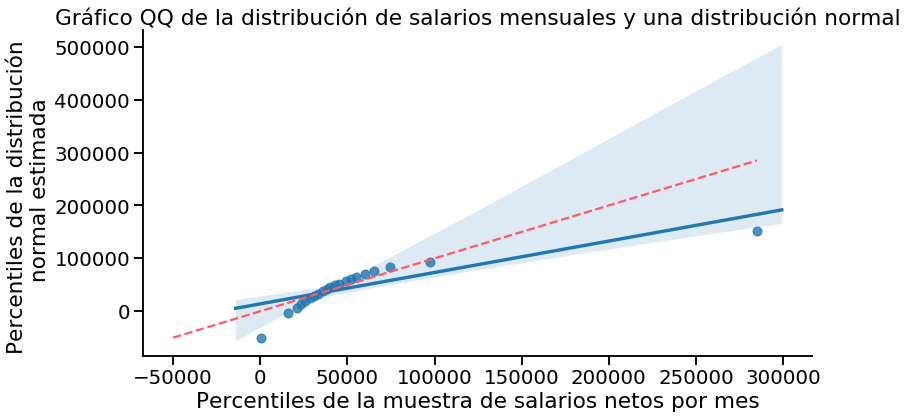

In [35]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de salarios netos por mes')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de salarios mensuales y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color=RED, ls="--")

seaborn.despine()

Por otra parte, también podemos usar el gráfico QQ para **comparar la distribución de salarios entre hombre y mujeres**. Si la diferencia en los histogramas se debe sólo a que la muestra de mujeres es más pequeña, entonces las distribuciones subyacentes deberían ser iguales. Por otro lado, si las distribuciones son distintas es probable que existan otros factores aparte de la cantidad que llevan a que mujeres cobren menos dinero.

In [35]:
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
salarios_men = salario_neto[salario_neto['Me identifico'] == 'Hombre'][NETO_COL]
salarios_women = salario_neto[salario_neto['Me identifico'] == 'Mujer'][NETO_COL]
qn_men = numpy.percentile(salarios_men, percs)
qn_women = numpy.percentile(salarios_women, percs)

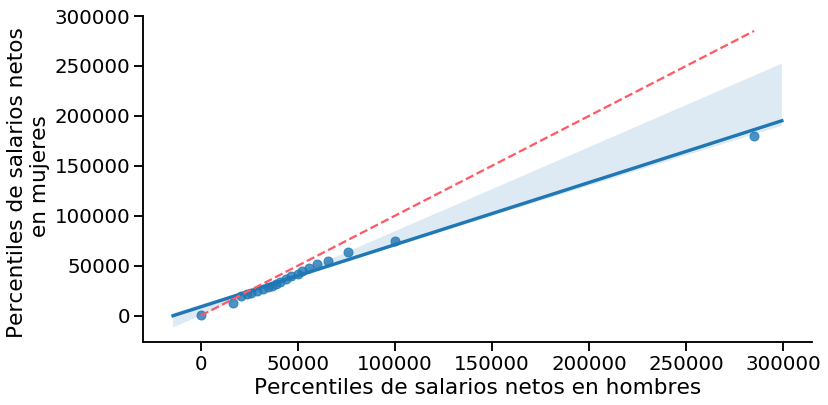

In [40]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_men, y=qn_women)
plt.xlabel('Percentiles de salarios netos en hombres')
plt.ylabel('Percentiles de salarios netos \n en mujeres')

# Graficamos la linea de la identidad.
x = numpy.linspace(numpy.min((qn_men.min(),qn_women.min())), numpy.max((qn_men.max(),qn_women.max())))
plt.plot(x,x, color=RED, ls="--")

seaborn.despine()

Este gráfico nos indica que hay una correlación lineal entre ambas distribuciones, pero que no son iguales.

# Clase II: Correlación y gráficos avanzados

Previamente vimos los tipos de gráficos más simples, que utilizan encoding visuales comunes. Sin embargo, podemos componer esos encodings visuales para representar más variables dentro de un mismo gráfico. Sin embargo, mientras más información estemos codificando, más compleja se vuelve nuestra visualización y necesitamos herramientas más poderosas.

## Heatmaps

Los heatmaps se utilizan para codificar la relación entre dos variables categóricas o discretas (o discretizadas!). Lo importante es que si al menos una de las variables es discreta, ya no podemos utilizar otro tipo de gráficos como `regplot` o `pairplot`. 

Por ejemplo, una pregunta posible podría ser **¿Qué tipo de trabajo tienen los programadores más satisfechos con su trabajo?**. Para responder esto, debemos analizar las variables relacionadas al tipo de contrato y a la satisfacción con el sueldo (que ya estuvimos viendo previamente).

In [37]:
dataset['Tipo de contrato'].isnull().sum(axis=0)

0

In [38]:
dataset['Tipo de contrato'].unique()

array(['Full-Time', 'Part-Time', 'Freelance',
       'Remoto (empresa de otro país)',
       'Tercerizado (trabajo a través de consultora o agencia)'],
      dtype=object)

In [39]:
dataset['Contrato'] = dataset['Tipo de contrato'].replace({
    'Remoto (empresa de otro país)': 'Remoto',
    'Tercerizado (trabajo a través de consultora o agencia)': 'Tercerizado'})

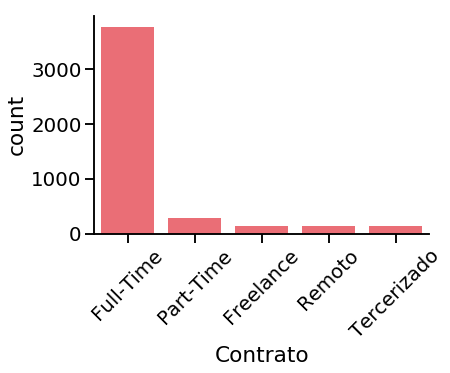

In [358]:
seaborn.countplot(dataset.Contrato, color=RED)
plt.xticks(rotation=45)
seaborn.despine()

In [40]:
CONFORME_COL = '¿Qué tan conforme estás con tu sueldo?'

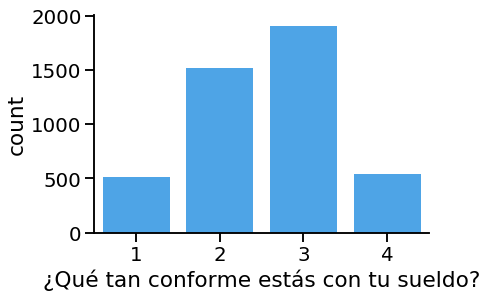

In [41]:
seaborn.countplot(dataset[CONFORME_COL], color=BLUE)
seaborn.despine()

En este tipo de situaciones con pocas categorías es ideal usar un heatmap. Sin embargo, no es tan intuitivo de hacer porque tenemos que pasar como argumento la matriz de co-ocurrencias ya previamente armada. Les recomendamos leer cómo funciona el comando pivot para entender cómo funciona el siguiente código, aunque existen otras formas como ´crosstab´

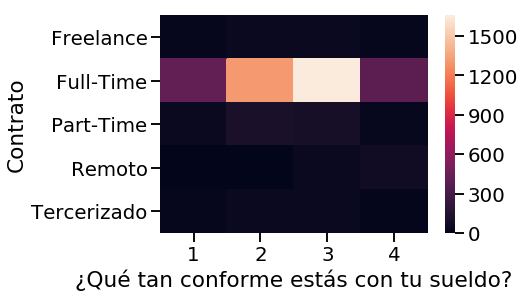

In [42]:
exp = dataset[['Contrato', CONFORME_COL]]
exp = exp.pivot_table(index='Contrato', columns=CONFORME_COL, aggfunc=len, fill_value=0)
seaborn.heatmap(exp)

Este gráfico es tan poco informativo porque todas la masa de probabilidad está siendo absorvida por los eventos con mayor probabilidad marginal: fulltime y un puntaje de 3.0 o 2.0. ¿Hay tantas de estas combinaciones porque siempre ocurren juntas, o sólo porque son los elementos más frecuentes?

## Test de independencia

Cuando no podemos corroborar una correlación visualmente, podemos realizar un análisis a través de test de independencia. A continuación, utilizaremos el test chi-cuadrado. Este test compara dos variables categoricas y la única restricción que pone es que todas las categorías tengan al menos 5 elementos.

Es test chi-cuadrado computa el estadístico chi-cuadrado y el p valor para la hipótesis de que las observaciones presentadas en la tabla de contingencia (co-ocurrencias) provienen de distribuciones independiente (hipótesis nula, o lo que queremos rechazar). No entraremos en detalles sobre el significado del estadístico, pero sí podemos decir que el p-valor es la probabilidad de que, si la hipótesis nula es cierta (son independientes) el valor del estadístico sea mayor o igual que el que obtuvimos (se rechaze la hipótesis nula). En fórmula:

p-valor = P (Hipótesis nula se rechaza|Hipótesis nula es cierta) 

Este tests y muchos otros están implementados en la librería scipy.

In [43]:
from scipy import stats

In [44]:
# Usamos la misma tabla que para el heatmap!
chi2, p, dots, expected = stats.chi2_contingency(exp)

In [45]:
chi2, p

(289.91038948920044, 6.150097356340793e-55)

El p-valor es bastante pequeño, lo que significa que si las variables son independientes, entonces en muy poco probable que el test se equivoque y nos haga decir que son depedientes.

LO CUAL NO QUIERE DECIR QUE TENGAMOS EVIDENCIA SEGURA PARA AFIRMAR QUE SON DEPENDIENTES (la hipótesis alternativa es cierta), solamente estamos hablando de la seguridad que tiene el test de que hizo un buen trabajo. Podría suceder que la hipótesis nula sea cierta (son independientes) y que el test todavía asegura que la hipótesis nula es falsa, pero esto ocurre sólo con una probablidad p.

Pongamoslo en números. Supongamos que tengo 1000 muestras con la misma distribución (o sea, realizo este análisis sobre otros 1000 conjuntos de datos). Si el p-valor es de 0.05, entonces significa que en 50 experimentos voy a decir que las variables no son independientes (rechazar la hipótesis nula) cuando en realidad no lo son (porque la hipótesis nula era falsa). Es decir, en 50 experimentos voy a decir que la satisfacción con el sueldo sí se correlaciona con el tipo de contrato que tenés, cuando en realidad no tienen nada que ver.

El p-valor nos permite tomar una decisión dada una probabilidad del error del test, pero tenemos que tener presentes que nunca estimamos ¿cuál es la probabilidad de que digamos que las variables son dependientes (hipótesis alternativa) y que en realidad son dependientes (la hipótesis nula sea verdadera)? Esto se traduciría a: tu jefe quiere saber si con poner todos los empleados en blanco, estos se van a sentir más contentos con su sueldo aunque no les aumente un peso de bolsillo. Vos le decís que está sí, que las dos variables efectivamente están correlacionadas, pero resulta que son independientes, y tu jefe ahora tiene un plantel de empleados permanentes que siguen igual de insatisfechos. ¿Cuál es la probabilidad de que eso suceda?

Depende de qué tan probable sea tu hipótesis alternativa (de que sí existe una relación). Supongamos que es muy poco probable que exista una relación entre estas dos variables: la gente está satisfecha con su sueldo solamente si le pagan bien y no le importa estar en negro. En este caso, la hipótesis nula es muy probable (porque la alternativa no lo es), y podés saber que en la gran mayoría de los casos, tenés muy baja probabilidad de errarle.

Pero si tu hipótesis alternativa era muy probable, o sea que a la gente no le gusta estar en negro y que se siente poco satisfecha con su sueldo por eso, entonces quiere decir que en la mayoría de las veces, tu hipótesis nula va a ser falsa, y no tenés idea de con cuanta probabilidad el test se está equivocando. En esos casos, el p-valor no aporta ninguna información, porque sólo habla de cuando la hipótesis nula es cierta. 

Para repasarlo con más detalle: https://www.youtube.com/watch?v=eesUdFlYMh8

Disclaimer: para ejemplificar mejor, algunas veces tomo "correlación" con un sentido de "causalidad", pero sólo para quede un poco más entretenido.

## Jointplots

En caso de que querramos estimar la correlación entre variables que sean numéricas, también se puede usar el *seaborn.jointplot*, pero no siempre logra un resultado interpretable.

Volvamos al ejemplo del porcentaje de aumento con respecto al sueldo neto. Haremos un jointplot con *kind=ked* y *kind=hex*. Con ambos gráficos podemos ver mejor las distribuciones que con el regplot, ya que los puntos individuales son agregados en una función de calor. Sin embargo, sucede lo mismo que con los heatmaps: no podemos asegurar que la concentración de valores conjuntos no sea sólo producto de los valores más frecuentes de cada distribución independiente.

C:\Users\cintia.chaves\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


<Figure size 720x432 with 0 Axes>

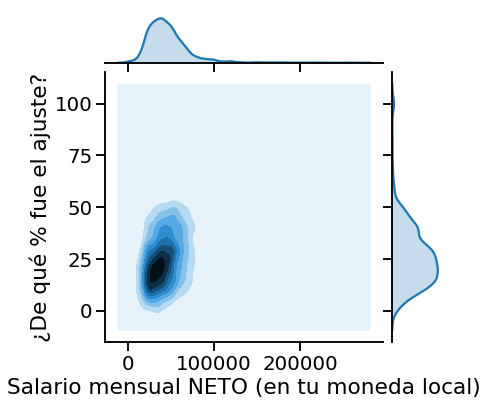

In [47]:
plt.figure(figsize=(10,6))
seaborn.jointplot(data=data_ajustes[con_aumento],
                  x=NETO_COL, y='¿De qué % fue el ajuste?', kind='kde')

C:\Users\cintia.chaves\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


<Figure size 720x432 with 0 Axes>

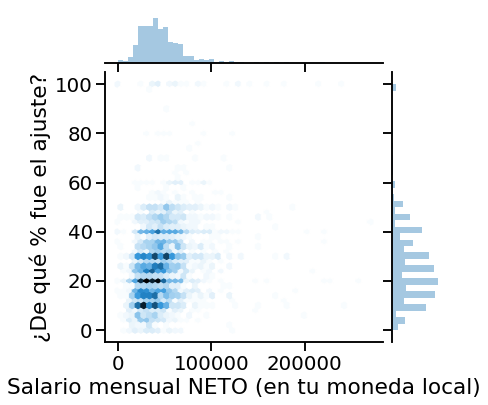

In [48]:
plt.figure(figsize=(10,6))
seaborn.jointplot(data=data_ajustes[con_aumento],
                  x=NETO_COL, y='¿De qué % fue el ajuste?', kind='hex')

Finalmente, si los valores son numéricos **y continuos**, antes de utilizar un mapa de calor se debe "categorizar" los valores, es decir, dividirlos en intervalos. Para esto se puede usar la función de pandas `cut`

## Pairplots

Los pairplots son muy útiles para comparar muchas variables numéricas al mismo tiempo. Por ejemplo, se puede hacer una comparación entre el porcentaje de aumento, los valores del sueldo el neto y los *Años de experiencia*

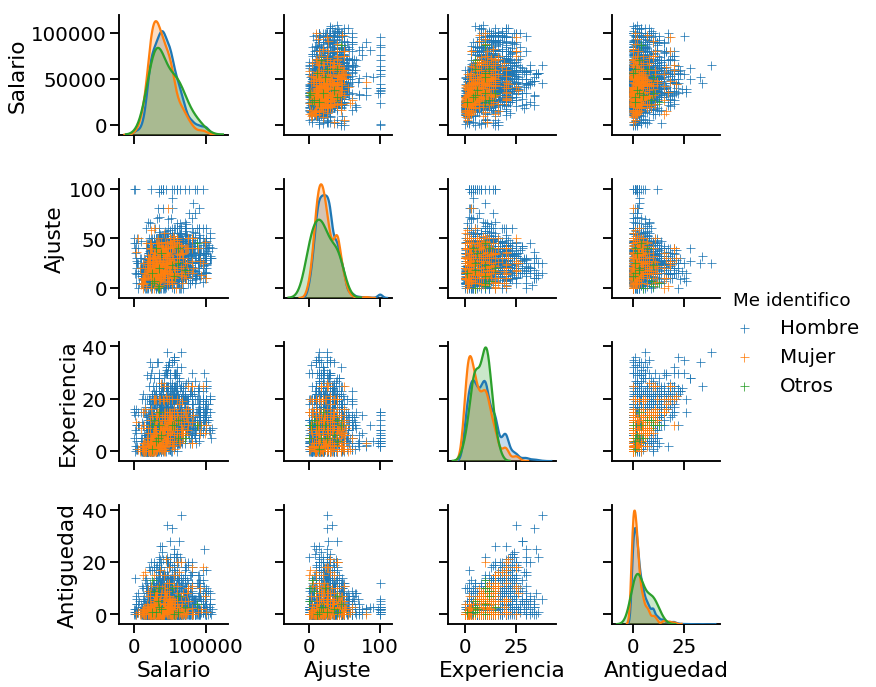

In [52]:
plot_data = clean_salario_neto(
    dataset[con_aumento & age_mask & (dataset['Años en la empresa actual'] < 40) & (dataset['Años de experiencia'] < 40)])
plot_data = plot_data.rename(columns={
    'Años en la empresa actual': 'Antiguedad', 'Años de experiencia': 'Experiencia',
    NETO_COL: 'Salario', '¿De qué % fue el ajuste?': 'Ajuste'
})
seaborn.pairplot(
    data=plot_data,
    vars=['Salario', 'Ajuste', 'Experiencia', 'Antiguedad'],
    hue='Me identifico', 
    markers='+')

Si bien este tipo de gráfico resume mucha información y nos permite buscar patrones visuales con gran rapidez, por eso mismo es difícil de explicar y lleva unos minutos de leer completamente. Por ello, es recomendable para medios gráficos como informes técnicos, pero no para presentaciones o piezas de divulgación.

## Combinaciones con cat plot

Uno de los aspectos más poderosos de seaborn es la habilidad de combinar distintos gráficos en filas y columnas con pocas líneas de código, a diferencia de otras librerías como matplotlib. La función `catplot` o `factoplot` en versiones anteriores permite usar los siguienetes parámetros:
* Eje x e y para variables numéricas y/o categóricas, cada combinación con un gráfico distinto.
* Hue, o distinción por grupos por color.
* Filas y columnas para variables categóricas.

Al tener tantas posibilidades de combinaciones, se debe elegir con cuidado la jerarquía de los elementos gráficos de acuerdo a las comparaciones más importantes a realizar.

Este tipo de gráfico es útil, al igual que el `pairplot` sirve mucho para la exploración, pero no tanto para la presentación de datos.

Por ejemplo, ¿por qué hay tan pocas mujeres programadoras con pos doc en Córdoba, comparado con la cantidad de hombres y la distribución general en el resto del país?

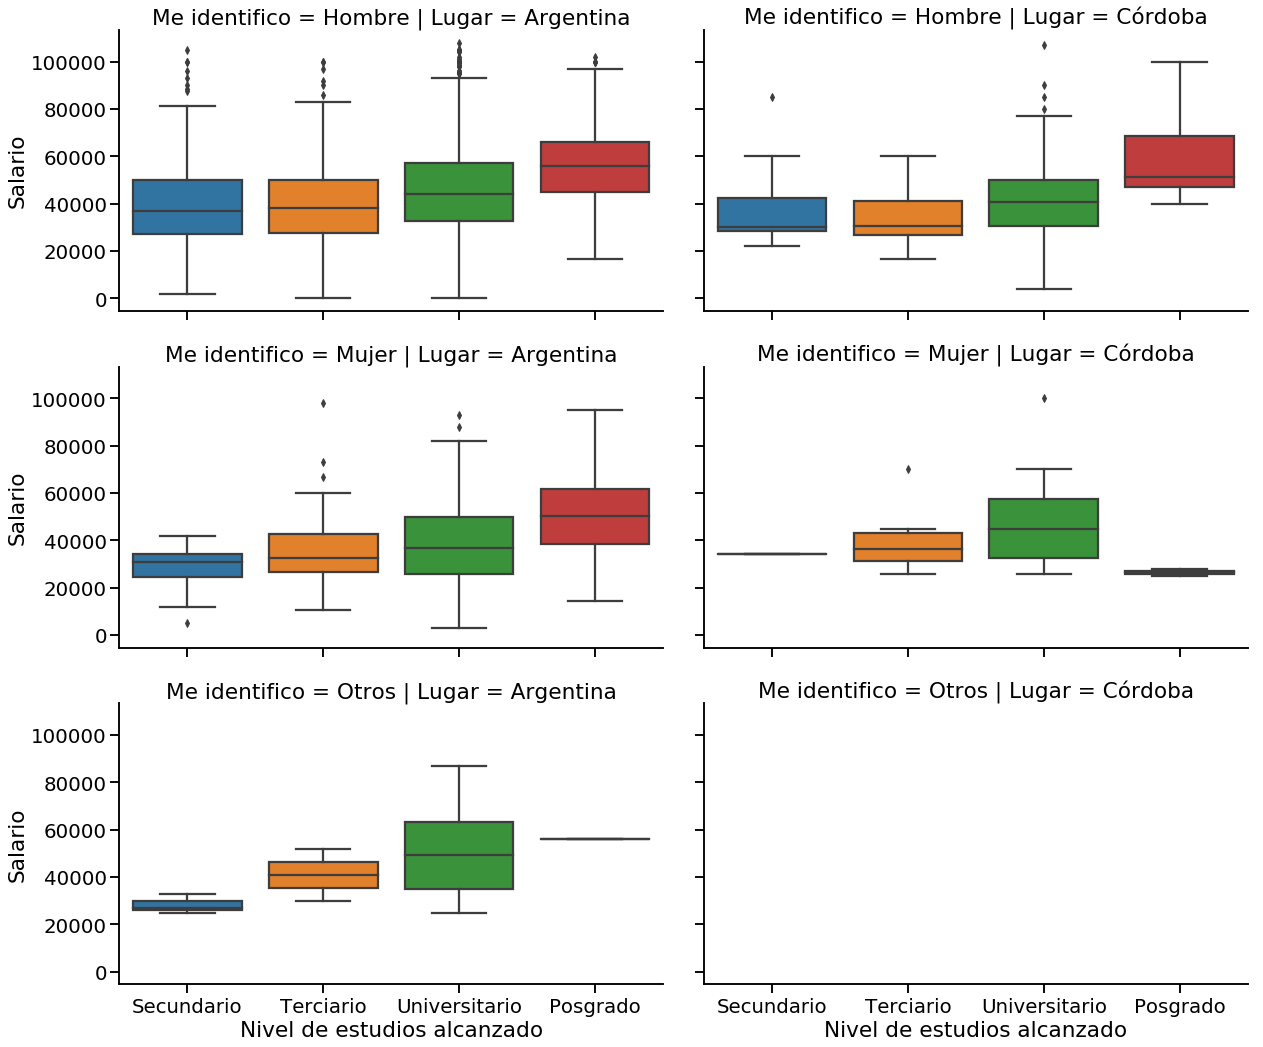

In [53]:
catplot_data = plot_data  # Dataset half clean
catplot_data.loc[:,'Nivel de estudios alcanzado'] = catplot_data['Nivel de estudios alcanzado'].replace(
{'Doctorado': 'Posgrado', 'Posdoctorado': 'Posgrado'})
catplot_data = catplot_data[catplot_data['Nivel de estudios alcanzado'] != 'Primaria']

catplot_data['Lugar'] = catplot_data['Dónde estás trabajando'].apply(lambda x: 'Argentina' if x != 'Córdoba' else x)

order = ['Secundario', 'Terciario', 'Universitario', 'Posgrado']
g = seaborn.catplot(
    data=catplot_data, x='Nivel de estudios alcanzado', y='Salario', order=order,
    row='Me identifico', col='Lugar',
    kind='box',
    aspect=1.8)